In [1]:
%matplotlib inline


# Plot multinomial and One-vs-Rest Logistic Regression
# 多项式与One-vs-Rest的Logistic回归的决策面展示

Plot decision surface of multinomial and One-vs-Rest Logistic Regression. The hyperplanes corresponding to the three One-vs-Rest (OVR) classifiers are represented by the dashed lines.
  
绘制多项式与OVR的Logisitc回归的决策面，其中三个One-vs-Rest(OVR)分类器的超平面用虚线表示。



In [2]:
print(__doc__)
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

Automatically created module for IPython interactive environment


## sklearn.datasets.make_blobs聚类数据生成器
sklearn.datasets.make_blobs(n_samples=100, n_features=2,centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)  
- n_samples：表示数据样本点个数,默认值100
- n_features：表示数据的维度，每个样本的特征数，默认值是2
- centers：产生数据的中心点（即类别数），默认值3
- cluster_std：数据集的标准差，浮点数或者浮点数序列，默认值1.0，例如我们希望生成2类数据，其中一类比另一类具有更大的方差，可以将cluster_std设置为[1.0,3.0]
- center_box：中心确定之后的数据边界，默认值(-10.0, 10.0)
- shuffle ：洗乱，默认值是True
- random_state:官网解释是随机生成器的种子

In [3]:
# make 3-class dataset for classification
# 创建3分类数据集的中心点
centers = [[-5, 0], [0, 1.5], [5, -1]]
# 生成数据
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)

# 对X进行矩阵变换
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

训练模型的性能: 0.995 (multinomial)
训练模型的性能: 0.976 (ovr)


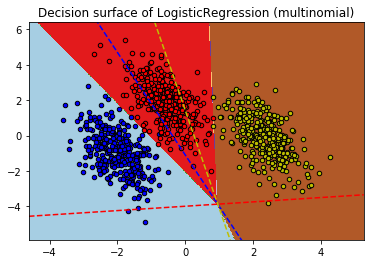

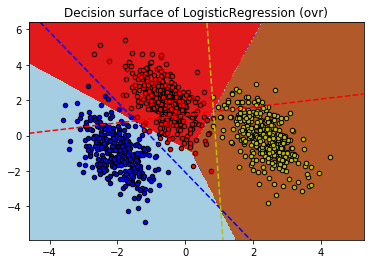

In [4]:
# 分别对多项式(MVM)和One-vs-Rest(OVR)进行Logistic回归
for multi_class in ('multinomial', 'ovr'):
    # 训练Logistic回归模型
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    # 打印训练模型的性能
    # print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))
    print("训练模型的性能: %.3f (%s)" % (clf.score(X, y), multi_class))
    
    # create a mesh to plot in
    # 创建绘制图形的网格
    # step size in the mesh
    # 设置网格的间隔大小
    h = .02
    # 得到数据集的最大值和最小值
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # 得到标签集的最大值和最小值
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # 从小到大，间隔0.02创建坐标矩阵xx，yy
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    # 绘制决策分界面，设定一种颜色一个分类
    # 根据网格点，对数据进行分类预测
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    # 将结果变成一维向量
    Z = Z.reshape(xx.shape)
    # 初始化plt
    plt.figure()
    # 按照等高线进行绘制
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    # 设置坐标轴显示，tight:坐标轴数据显示更明细
    plt.axis('tight')

    # Plot also the training points
    # 设置点的颜色序列为蓝、红、黄
    colors = "bry"
    # 绘制数据集X的散点图
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    # 返回plt的参数范围
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    # 得到模型的w和b
    coef = clf.coef_
    intercept = clf.intercept_

    # 定义绘制分隔超平面
    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)
    
    # 调用函数绘制分隔超平面
    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()